In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

# Carga el dataset LFW
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=1, color=False, download_if_missing=True)

# Inspección de los tamaños
n_samples, h, w = lfw_people.images.shape

# Datos sin dividir en subconjuntos
X = lfw_people.images
X = X[..., np.newaxis]
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("h, w: (%d, %d)" % (h, w))
print("n_samples: %d" % n_samples)
print("n_classes: %d" % n_classes)


Total dataset size:
h, w: (125, 94)
n_samples: 1288
n_classes: 7


In [2]:
# Separa el dataset en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# Normaliza los datos
scaler = StandardScaler()
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)
X_train_flat = scaler.fit_transform(X_train_flat)
X_test_flat = scaler.transform(X_test_flat)
X_train = X_train_flat.reshape(X_train.shape)
X_test = X_test_flat.reshape(X_test.shape)

In [4]:
# Modelo 1: Red densa
dense_model = Sequential([
    Flatten(input_shape=(h, w, 1)),
    Dense(128, activation='relu'),
    Dropout(0.4),  # Ajustar la tasa de Dropout
    Dense(64, activation='relu'),
    Dropout(0.4),  # Ajustar la tasa de Dropout
    Dense(n_classes, activation='softmax')
])

dense_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                    loss='sparse_categorical_crossentropy', metrics=['accuracy'])
dense_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - accuracy: 0.2248 - loss: 2.6003 - val_accuracy: 0.5243 - val_loss: 1.4146
Epoch 2/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.3984 - loss: 1.8344 - val_accuracy: 0.5825 - val_loss: 1.1965
Epoch 3/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.5249 - loss: 1.4643 - val_accuracy: 0.6311 - val_loss: 1.0211
Epoch 4/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.6023 - loss: 1.1849 - val_accuracy: 0.6699 - val_loss: 0.9351
Epoch 5/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6383 - loss: 1.0330 - val_accuracy: 0.6699 - val_loss: 0.8714
Epoch 6/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6541 - loss: 0.9350 - val_accuracy: 0.6990 - val_loss: 0.8758
Epoch 7/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6956 - loss: 0.8509 - val_accuracy: 0.7136 - val_loss: 0.7850
Epoch 8/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7266 - loss: 0.7667 - val_accuracy: 0.7427 - v

In [5]:
# Evaluar el modelo denso ajustado
dense_train_accuracy = dense_model.evaluate(X_train, y_train)[1]
dense_test_accuracy = dense_model.evaluate(X_test, y_test)[1]
print(f"Dense Model - Training Accuracy: {dense_train_accuracy}")
print(f"Dense Model - Test Accuracy: {dense_test_accuracy}")

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9843 - loss: 0.0704
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8321 - loss: 0.6024 
Dense Model - Training Accuracy: 0.9543689489364624
Dense Model - Test Accuracy: 0.8333333134651184


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


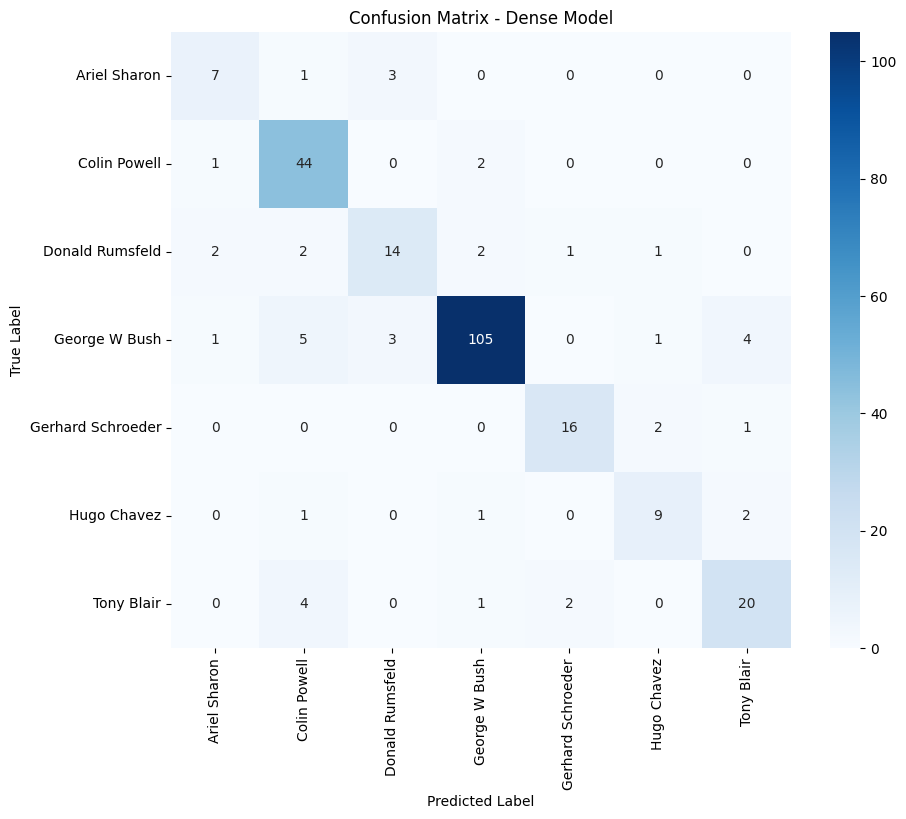

In [7]:
# Matriz de confusión para el modelo denso
y_pred_dense = np.argmax(dense_model.predict(X_test), axis=-1)
conf_matrix_dense = confusion_matrix(y_test, y_pred_dense)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_dense, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.title("Confusion Matrix - Dense Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()